In [ ]:
'''The effect of temperature and reaction time affects the %yield. 
   Develop a model for %yield in terms of temperature and time'''

In [12]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols as myols
from statsmodels.stats.anova import anova_lm

In [13]:
df = pd.read_csv('.\datasets\Mult_Reg_Yield.csv')
print(df.head())

   Time  Temperature  Yield
0   130          190   35.0
1   174          176   81.7
2   134          205   42.5
3   191          210   98.3
4   165          230   52.7


In [14]:
temp = df.Temperature
yiel = df.Yield
time = df.Time

In [15]:
# Check  for relation

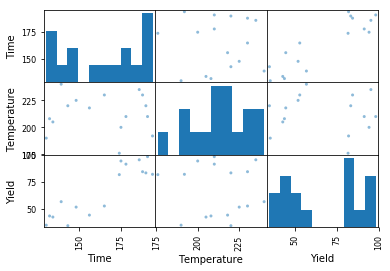

In [16]:
scatter_matrix(df)
plt.show()

In [17]:
np.corrcoef(temp, yiel)

array([[ 1.        , -0.05456951],
       [-0.05456951,  1.        ]])

In [18]:
np.corrcoef(temp, time)

array([[ 1.        , -0.00756007],
       [-0.00756007,  1.        ]])

In [19]:
np.corrcoef(yiel, time)

array([[1.        , 0.89671196],
       [0.89671196, 1.        ]])

In [20]:
df.corr()

,Time,Temperature,Yield
Time,1.000000,-0.00756,0.896712
Temperature,-0.007560,1.00000,-0.054570
Yield,0.896712,-0.05457,1.000000


In [23]:
mymodel = myols("yiel ~ time + temp", df).fit()
mymodel.summary()

C:\Users\Goutam Dadhich\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yiel   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.07
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           2.32e-05
Time:                        08:35:18   Log-Likelihood:                -59.703
No. Observations:                  16   AIC:                             125.4
Df Residuals:                      13   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.8844     40.587     -1.673      0.118    -155.566      19.797
time           0.9061      0.123      7.344      0.000       0.640       1.173
temp          -0.0642      0.164     -0.392      0.702      -0.418       0.290
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                0.970
Skew:                          -0.078   Prob(JB):                        0.616
Kurtosis:                       1.804   Cond. No.                     3.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
mymodel = myols("yiel ~ time", df).fit()
mymodel.summary()

C:\Users\Goutam Dadhich\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yiel   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     57.46
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           2.55e-06
Time:                        08:42:13   Log-Likelihood:                -59.797
No. Observations:                  16   AIC:                             123.6
Df Residuals:                      14   BIC:                             125.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.6205     19.791     -4.124      0.001    -124.067     -39.174
time           0.9065      0.120      7.580      0.000       0.650       1.163
==============================================================================
Omnibus:                        1.894   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                0.969
Skew:                          -0.127   Prob(JB):                        0.616
Kurtosis:                       1.822   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
pred = mymodel.predict()
res = yiel - pred
res

0     -1.218472
1      5.597558
2      2.655712
3      6.787842
4    -15.244357
5    -12.231519
6    -13.502372
7      8.420112
8     12.323443
9     -4.392796
10    17.291104
11   -15.486272
12    -7.305704
13    11.671743
14     5.468620
15    -0.834642
Name: Yield, dtype: float64

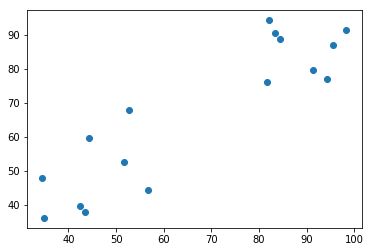

In [27]:
plt.scatter(yiel, pred)
plt.show()

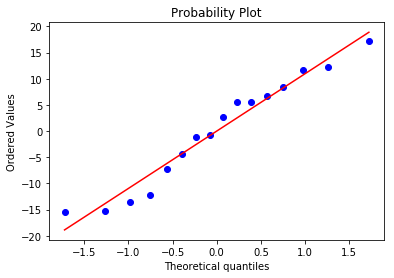

In [30]:
st.probplot(res, plot= plt)
plt.show()

In [31]:
# Noramlity Test

st.normaltest(res)

C:\Users\Goutam Dadhich\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.8944805759902987, pvalue=0.3878097913672042)

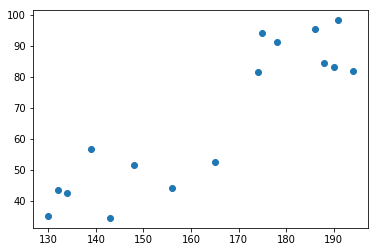

In [32]:
# residual vs independent variable

plt.scatter(time, yiel)
plt.show()

In [ ]:
#residual vs fitted

